# Introduction to Solving Systems with Python

## Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. In the case of one independent variable it is called simple linear regression.
Let $x$ be the independent variable and $y$ be the dependent variable. We will define a linear relationship between these two variables as follows:
$$y=mx+b$$
Given multiple points $(x_1, y_1),\ldots,(x_k,y_k)$, we can define a system of equations as follows:
$$\begin{cases}y_1=mx_1+b\\y_2=mx_2+b\\\vdots\\y_k=mx_k+b\end{cases}$$
which corresponds to the matrix system
$$\begin{pmatrix}y_1\\\vdots\\y_k\end{pmatrix} = \begin{pmatrix}x_1&1\\x_2&1\\\vdots\\x_k&1\end{pmatrix}\begin{pmatrix}m\\b\end{pmatrix}$$

Given the points $(-8, -2)$, $(-3, 1)$, $(-1, 3)$, $(7, 6)$, $(10, 10)$, let us find the line of best fit through these points.
First let's split the points up into their own vectors.

In [224]:
points = [(-8,-2), (-3,1), (-1,3), (7,6), (10,10)]
x_vals = [pt[0] for pt in points]
y_vals = [pt[1] for pt in points]
print(x_vals)
print(y_vals)

[-8, -3, -1, 7, 10]
[-2, 1, 3, 6, 10]


Now let's define a plot.

(-5.0, 15.0)

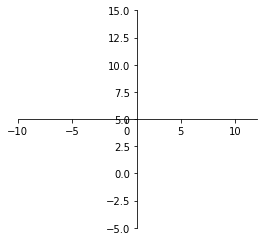

In [225]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

#define axes
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.spines['left'].set_position('center')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('center')
ax1.spines['top'].set_color('none')

#define window
x_min = -10
x_max = 12
y_min = -5
y_max = 15
x_lim = [x_min, x_max]
y_lim = [y_min, y_max]
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)

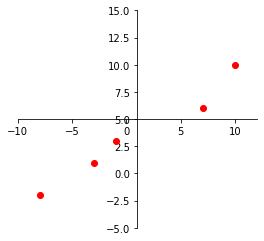

In [226]:
pts_plot = ax1.plot(x_vals, y_vals, 'ro')
plt.sca(ax1) #set current axis
plt.show()

Now let's solve the linear system. Since the points are $(-8,-2)$, $(-3,1)$, $(-1,3)$, $(7,6)$, $(10,10)$, we have the system
$$\begin{cases}-2 = -8m + b\\1=-3m + b \\3=-1m+b\\6 = 7m+b\\10=10m+b\end{cases}$$
Which corresponds to the matrix equation
$$\begin{pmatrix}-2\\1\\3\\6\\10\end{pmatrix} = \begin{pmatrix}-8&1\\-3&1\\-1&1\\7&1\\10&1\end{pmatrix}$$
Let's define the matrix in python.

In [227]:
y = y_vals.copy()
A = [[-8,1],[-3,1], [-1,1], [7,1], [10,1]]

If we were to solve this system using row-reduction, there'd be no solution (which makes sense, since there is clearly no line that goes through all the points.) So we solve the normal equation
$$A^TAx = A^Ty$$
$$\begin{pmatrix}-8&-3&-1&7&10\\1&1&1&1&1\end{pmatrix}\begin{pmatrix}-2\\1\\3\\6\\10\end{pmatrix} = \begin{pmatrix}-8&-3&-1&7&10\\1&1&1&1&1\end{pmatrix}\begin{pmatrix}-8&1\\-3&1\\-1&1\\7&1\\10&1\end{pmatrix}$$
Let's use the numpy library in Python to multiply the matrices.

In [228]:
import numpy as np

At = np.transpose(A)
At_A = np.matmul(At, A)
At_y = np.matmul(At, y)
print("This is A^T*A:")
print(At_A)
print("This is A^T*y:")
print(At_y)

This is A^T*A:
[[223   5]
 [  5   5]]
This is A^T*y:
[152  18]


Now, one way of solving for $x$ would be to calculate the inverse of $A^TA$ and multiply it to $A^Ty$, so
$$x=(A^TA)^{-1}A^T y$$

In [229]:
import numpy.linalg as la
At_A_inv = la.inv(At_A)
print(At_A_inv)

[[ 0.00458716 -0.00458716]
 [-0.00458716  0.20458716]]


In [230]:
x_sol = np.matmul(At_A_inv, At_y)
print(x_sol)

[0.6146789 2.9853211]


The first element of $x$ corresponds to the slope $m$ of our best-fit line, and the second element corresponds to the $y$-intercept $b$ of our best-fit line. Let's plot it:


In [231]:
m = x_sol[0]
b = x_sol[1]

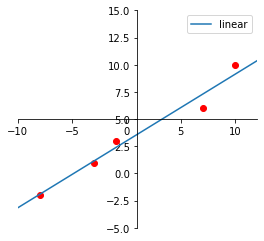

In [232]:
x = np.linspace(-20, 20, 1000)
lin_plot = ax1.plot(x, m*x + b, label = 'linear')
ax1.legend()
plt.sca(ax1)
plt.show()

To calculate the residual value, we will find the norm between the approximated y-values and the actual:

In [233]:
y_approx = np.matmul(A, x_sol)
print("The approximated y-values are:")
print(y_approx)
print("The actual y-values are:")
print(y)

The approximated y-values are:
[-1.93211009  1.1412844   2.3706422   7.28807339  9.13211009]
The actual y-values are:
[-2, 1, 3, 6, 10]


In [234]:
residual = np.subtract(y, y_approx)
r_sq = la.norm(residual)**2
print(r_sq)

2.8330275229357778


Now let's use Python's built-in function to calculate the least-squares solution:

In [235]:
print(la.lstsq(A, y, rcond=None)) #rcond is the Cut-off ratio for small singular values of a.

(array([0.6146789, 2.9853211]), array([2.83302752]), 2, array([14.93702175,  2.21028988]))


And let's compare it to what we found:

In [236]:
print("The solution vector we found, the residual we found, and the rank of A is:")
print(x_sol, r_sq, la.matrix_rank(A), sep=", ")

The solution vector we found, the residual we found, and the rank of A is:
[0.6146789 2.9853211], 2.8330275229357778, 2


## Quadratic regression

Let us try to find the quadratic equation $y=ax^2+bx+c$ that best fits this curve. To do this, since the points are $(-8,-2)$, $(-3,1)$, $(-1,3)$, $(7,6)$, $(10,10)$, we have the system 
$$\begin{cases}-2 = a(-8)^2 + b(-8) + c\\1=a(-3)^2 + b(-3) + c \\3=a(-1)^2 + b(-1) + c\\6 = a(7)^2 + b(7) + c\\10=a(10)^2 + b(10) + c\end{cases}$$
Which corresponds to the matrix equation
$$\begin{pmatrix}-2\\1\\3\\6\\10\end{pmatrix} = \begin{pmatrix}(-8)^2&-8&1\\(-3)^2&-3&1\\(-1)^2&-1&1\\7^2&7&1\\10^2&10&1\end{pmatrix}$$
Let's define the matrix.

In [237]:
A2 = [[(-8)**2, (-8), 1], [(-3)**2, (-3), 1], [(-1)**2, (-1), 1], [7**2, 7, 1], [10**2, 10, 1]]


Now let's solve the normal equation
$$A^TAx = A^Ty$$

In [238]:
A2t = np.transpose(A2)
A2t_A2 = np.matmul(A2t, A2)
A2t_y = np.matmul(A2t, y)

A2t_A2_inv = la.inv(A2t_A2)
x_sol_2 = np.matmul(A2t_A2_inv, A2t_y)
print(x_sol_2)

[0.00367111 0.60491173 2.83135683]


In [239]:
a2 = x_sol_2[0]
b2 = x_sol_2[1]
c2 = x_sol_2[2]
quad_plot = ax1.plot(x, a2*x**2 + b2*x + c2, label = 'quadratic')

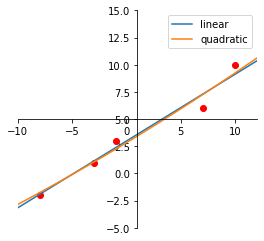

In [240]:
ax1.legend()
plt.sca(ax1)
plt.show()

The quadratic curve is hard to see with the linear curve there, so let's remove the linear one for now:

In [241]:
lin_plot[0].set(visible=False)

[None]

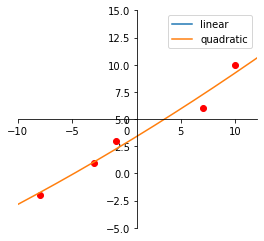

In [242]:
plt.sca(ax1)
plt.show()

Let's shift our axes a bit:

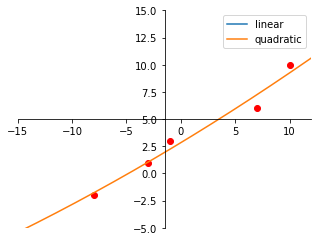

In [243]:
ax1.set_xlim([-15, 12])
plt.sca(ax1)
plt.show()

And if we want to see the linear curve again:

In [244]:
lin_plot[0].set(visible=True)

[None]

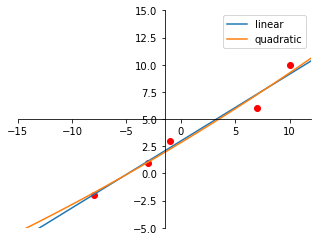

In [245]:
plt.sca(ax1)
plt.show()

Anyways, let's check our work: first let's find the residual:

In [246]:
y_approx_2 = np.matmul(A2, x_sol_2)
print(y_approx_2)

[-1.77298606  1.04966162  2.23011621  7.24562326  9.24758498]


In [247]:
residual_2 = np.subtract(y, y_approx_2)
r_sq_2 = la.norm(residual_2)**2

In [248]:
print(la.lstsq(A2, y, rcond=None)) #rcond is the Cut-off ratio for small singular values of a.

(array([0.00367111, 0.60491173, 2.83135683]), array([2.76442831]), 3, array([128.92370226,  13.55962839,   1.3473953 ]))


In [249]:
print("\nThe solution vector we found, the residual we found, and the rank of A is:")
print(x_sol_2, r_sq_2, la.matrix_rank(A2), sep=", ")


The solution vector we found, the residual we found, and the rank of A is:
[0.00367111 0.60491173 2.83135683], 2.764428314253227, 3


## k-th degree regression

Let's generalize our previous steps by defining functions to generalize our process. To find our system matrix $A$ for a polynomial of degree $k$, we define the following function:

In [250]:
def sys_matrix(k, x_vals):
    return [[x**i for i in range(k, -1, -1)] for x in x_vals]

And, given a system matrix, let's define a function that solves for the solution vector:

In [251]:
def solve_system(A, y_vals):
    At = np.transpose(A)
    AtA = np.matmul(At, A)
    AtA_inv = la.inv(AtA)
    At_y = np.matmul(At, y)
    return np.matmul(AtA_inv, At_y)

So let's apply the above to $k=1$ and $k=2$ to check our work:

In [252]:
print("The system matrix for k=1 is ")
print(sys_matrix(1, x_vals))
print("The solution vector for k=1 is ")
solve_system(sys_matrix(1, x_vals),y_vals)

The system matrix for k=1 is 
[[-8, 1], [-3, 1], [-1, 1], [7, 1], [10, 1]]
The solution vector for k=1 is 


array([0.6146789, 2.9853211])

In [253]:
print("The values we got earlier for k=1 were:")
print(A)
print(x_sol)

The values we got earlier for k=1 were:
[[-8, 1], [-3, 1], [-1, 1], [7, 1], [10, 1]]
[0.6146789 2.9853211]


In [254]:
print("The system matrix for k=2 is ")
print(sys_matrix(2, x_vals))
print("The solution vector for k=2 is ")
solve_system(sys_matrix(2, x_vals),y_vals)

The system matrix for k=2 is 
[[64, -8, 1], [9, -3, 1], [1, -1, 1], [49, 7, 1], [100, 10, 1]]
The solution vector for k=2 is 


array([0.00367111, 0.60491173, 2.83135683])

In [255]:
print("The values we got earlier for k=2 were:")
print(A2)
print(x_sol_2)

The values we got earlier for k=2 were:
[[64, -8, 1], [9, -3, 1], [1, -1, 1], [49, 7, 1], [100, 10, 1]]
[0.00367111 0.60491173 2.83135683]


Now let's create a function to plot a curve given a range of $x$-values and a solution vector:

In [256]:
def plots(x, sol_vec):
...  ys = np.zeros(len(x))
...  curr_pow = len(sol_vec) - 1
...  for coeff in sol_vec:
...   ys = ys + coeff*x**curr_pow
...   curr_pow = curr_pow - 1
...  return ys
    

Now let's use our functions to solve for a cubic system:

In [257]:
cubic_plot = ax1.plot(x, plots(x, solve_system(sys_matrix(3, x_vals),y_vals)), label='cubic')

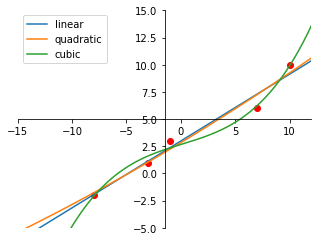

In [258]:
plt.sca(ax1)
plt.legend()
plt.show()

Now let's do a quartic (degree 4) plot:

In [259]:
quartic_plot = ax1.plot(x, plots(x, solve_system(sys_matrix(4, x_vals),y_vals)), label='quartic')

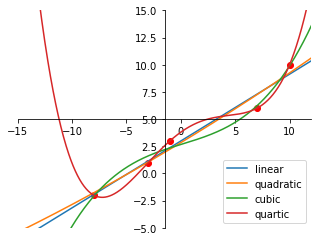

In [260]:
plt.sca(ax1)
plt.legend()
plt.show()

We notice that the quartic plot fits the points exactly! To understand this, consider that the quartic system of equations is the following: